# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MC_Sim import MCSimulation 

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

Python-dotenv could not parse statement starting at line 1


True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
BTC_assets = 1.2
ETH_assets = 5.3
LINK_assets = 150.0 

# NOTE for Grader: in the assignment description it says to only use BTC & ETH, 
# however I pulled LINK prices as well just for extra practice and curiosity


In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
link_url = "https://api.alternative.me/v2/ticker/Chainlink/?convert=USD"

In [5]:
# extract data from API's
response_data_btc = requests.get(btc_url).json()
response_data_eth = requests.get(eth_url).json()
response_data_link = requests.get(link_url).json()

# Fetch current BTC price
BTC_price = response_data_btc['data']['1']['quotes']['USD']['price']
print(f"Current price of BTC: ${BTC_price}")

# Fetch current ETH price
ETH_price = response_data_eth['data']['1027']['quotes']['USD']['price']
print(f"Current price of ETH: ${ETH_price}")

# Fetch current LINK price 
LINK_price = response_data_link['data']['1975']['quotes']['USD']['price']
print(f"Current price of LINK: ${LINK_price}")

# Compute current value of crypto
port_value_BTC = BTC_price * BTC_assets
port_value_ETH = ETH_price * ETH_assets
port_value_LINK = LINK_price * LINK_assets

# Print current crypto wallet balance
print(f"\nThe current value of your {BTC_assets} BTC is ${port_value_BTC:0.2f}")
print(f"The current value of your {ETH_assets} ETH is ${port_value_ETH:0.2f}")
print(f"The current value of your {LINK_assets} LINK is ${port_value_LINK:0.2f}")

Current price of BTC: $24411.0
Current price of ETH: $1954.35
Current price of LINK: $9.33

The current value of your 1.2 BTC is $29293.20
The current value of your 5.3 ETH is $10358.05
The current value of your 150.0 LINK is $1399.50


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg_shares = 200
my_spy_shares = 50

In [7]:
# Set Alpaca API key and secret
Alpaca_Api_Key = os.getenv("ALPACA_API_KEY")
Alpaca_Secret_Key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    Alpaca_Api_Key,
    Alpaca_Secret_Key,
    api_version = 'v2'
)

In [8]:
# Format current date as ISO format
start_date = pd.Timestamp('2021-08-12', tz = 'America/New_York').isoformat()
end_date = pd.Timestamp('2022-08-12', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Reorganize the DataFrame, Separate ticker data
df_portfolio = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date, 
).df

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_portfolio[df_portfolio['symbol'] == 'AGG'].drop('symbol', axis = 1)
df_portfolio.sort_index(ascending = False, axis = 0, inplace = True)

# Get current closing prices for SPY and AGG
SPY_closing_price = df_portfolio['close'][0]
AGG_closing_price = df_portfolio['close'][1]

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])
df_portfolio.sort_index(ascending = False, axis = 0, inplace = True)

# Preview DataFrame
df_portfolio.head()

SPY                                    \
                             open    high     low   close    volume   
timestamp                                                             
2022-08-12 04:00:00+00:00  422.10  427.21  421.03  427.10  61509557   
2022-08-11 04:00:00+00:00  423.00  424.95  419.21  419.99  59337460   
2022-08-10 04:00:00+00:00  418.71  420.14  416.72  419.99  68139304   
2022-08-09 04:00:00+00:00  412.30  412.75  410.22  411.35  44110509   
2022-08-08 04:00:00+00:00  415.25  417.62  411.83  412.99  53867272   

                                                      AGG                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2022-08-12 04:00:00+00:00      396703  424.554953  102.97  103.120  102.7200   
2022-08-11 04:00:00+00:00      443453  421.578655  103.38  103.630  102.6150   
2022-08-10 04:00:00+00:00      473663  418.182059  103.43  103.675  103.1095   
2022-08-09 04:00:00+00:00      366275  411.331714  102.92  103.045  102.8400   
2022-08-08 04:00:00+00:00      421156  414.421803  103.10  103.290  103.0400   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2022-08-12 04:00:00+00:00  103.12  3640849       16143  102.954053  
2022-08-11 04:00:00+00:00  102.66  8499300       24163  103.070842  
2022-08-10 04:00:00+00:00  103.21  6848952       19064  103.486096  
2022-08-09 04:00:00+00:00  102.95  3849491       17130  102.948831  
2022-08-08 04:00:00+00:00  103.18  3219068       15830  103.175213

In [9]:
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${AGG_closing_price}")
print(f"Current SPY closing price: ${SPY_closing_price}")

Current AGG closing price: $103.12
Current SPY closing price: $427.1


In [10]:
# Compute the current value of shares
port_value_SPY = SPY_closing_price * my_spy_shares
port_value_AGG = AGG_closing_price * my_agg_shares

# Print current value of shares
print(f"The current value of your {my_spy_shares} SPY shares is ${port_value_SPY:0.2f}")
print(f"The current value of your {my_agg_shares} AGG shares is ${port_value_AGG:0.2f}")

The current value of your 50 SPY shares is $21355.00
The current value of your 200 AGG shares is $20624.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12_000
total_value_crypto = port_value_BTC + port_value_ETH
total_value_stocks = port_value_AGG + port_value_SPY

# Create savings DataFrame
df_savings = pd.DataFrame({'amount': [total_value_crypto, total_value_stocks]}, index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,39651.255
shares,41979.000


<AxesSubplot:title={'center':'Personal Savings'}, ylabel='amount'>

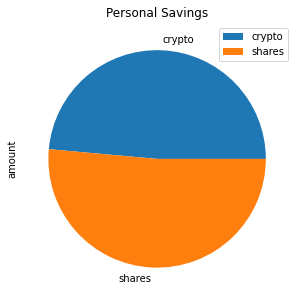

In [12]:
# Plot savings pie chart
df_savings.plot.pie(title = 'Personal Savings', y = 'amount', figsize = (5,5))

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_value_stocks + total_value_crypto

# Validate saving health
if total_savings > emergency_fund: 
    print(f'Congrats! You have enough money in this fund --> ${total_savings:,.2f}')
elif total_savings == emergency_fund: 
    print('Congrats on reaching this Financial Goal!')
elif total_savings < emergency_fund: 
    account_deficit = emergency_fund - total_savings
    print(f'You are ${account_deficit:,.2f} away from your Financial Goal!')

Congrats! You have enough money in this fund --> $81,630.26


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of four years back from today; Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [15]:
# Get 4 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers, 
    timeframe, 
    start = start_date, 
    end = end_date, 
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol', axis = 1)
AGG = df_stock_data[df_stock_data['symbol'] == 'AGG'].drop('symbol', axis = 1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([SPY, AGG], axis = 1, keys = ['SPY', 'AGG'])

# Display sample data
df_stock_data.head()

SPY                                       \
                             open      high      low   close    volume   
timestamp                                                                
2017-05-01 04:00:00+00:00  238.66  239.1700  238.195  238.68  66882521   
2017-05-02 04:00:00+00:00  238.82  238.9800  238.300  238.77  57375732   
2017-05-03 04:00:00+00:00  238.29  238.8775  237.700  238.48  73137731   
2017-05-04 04:00:00+00:00  238.81  238.9225  237.780  238.76  61462732   
2017-05-05 04:00:00+00:00  239.16  239.7200  238.680  239.70  62001269   

                                                      AGG                     \
                          trade_count        vwap    open      high      low   
timestamp                                                                      
2017-05-01 04:00:00+00:00      180740  238.682276  108.86  108.9599  108.620   
2017-05-02 04:00:00+00:00      176648  238.630973  108.68  108.9400  108.679   
2017-05-03 04:00:00+00:00      223568  238.418100  108.97  108.9900  108.770   
2017-05-04 04:00:00+00:00      208872  238.541805  108.55  108.7000  108.550   
2017-05-05 04:00:00+00:00      204885  239.253410  108.72  108.7400  108.570   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2017-05-01 04:00:00+00:00  108.73  2510027       11008  108.743679  
2017-05-02 04:00:00+00:00  108.88  2841518        9263  108.831870  
2017-05-03 04:00:00+00:00  108.77  1923403       10987  108.902870  
2017-05-04 04:00:00+00:00  108.68  1897912        7501  108.629678  
2017-05-05 04:00:00+00:00  108.70  1421843        7385  108.675918

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 30
)

In [17]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\minha\OneDrive\Documents\Financial_Analysis_Tool\MC_Sim.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998403,0.997349,0.990872,0.996876,1.011839,0.991077,1.009330,1.002236,1.001005,0.999760,...,1.001545,0.987025,1.009478,1.002140,1.000818,0.985378,1.010098,0.996303,0.996264,0.994133
2,0.987741,0.991361,0.983663,0.991645,1.029055,0.996652,1.008728,1.009892,0.989661,1.013498,...,1.008772,0.999035,1.019147,1.006240,0.996978,0.962627,1.006570,0.999125,0.993123,0.991052
3,0.982591,0.985023,0.968871,0.986959,1.025631,1.001167,1.020750,1.016057,0.989167,1.013592,...,1.002029,0.989535,1.019210,1.011192,0.982392,0.960490,1.005578,0.990521,1.008356,0.983753
4,0.981667,0.997100,0.966534,0.988830,1.032630,0.987031,1.028457,1.023112,0.985518,1.003248,...,0.996082,0.995450,1.026251,1.019182,0.977979,0.944365,1.006537,0.989986,1.023940,0.978074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,6.174625,13.963746,3.428549,38.392392,5.929059,49.917375,33.209315,7.992415,5.651985,23.502014,...,22.646802,16.788857,13.677137,35.153667,27.556023,21.317728,6.481378,29.042915,9.316989,7.990695
7557,6.089525,13.965137,3.435856,38.036650,5.938697,49.935499,33.203383,7.880596,5.666312,23.913233,...,22.912832,16.726114,13.493960,34.816250,27.837144,21.310689,6.461355,28.828197,9.312509,8.036224
7558,6.097600,13.946035,3.428223,37.965118,5.960151,49.661622,33.156909,7.899006,5.649703,24.127879,...,23.057844,16.837788,13.572941,34.832703,27.729424,21.590630,6.493882,28.680402,9.295343,8.020510
7559,6.102307,13.897017,3.449246,37.871639,6.040631,49.845018,33.163952,7.888944,5.646305,23.810053,...,22.960465,17.009591,13.810555,34.804698,27.868977,21.689152,6.505579,28.670129,9.300628,8.078404


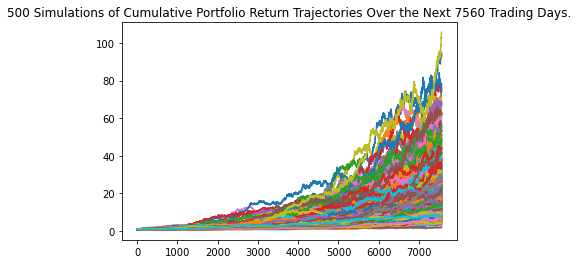

In [18]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation().plot(figsize = (10,5))

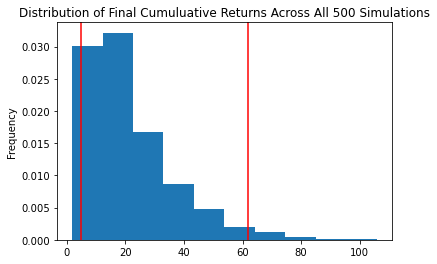

In [19]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

### Retirement Analysis

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean             21.337678
std              15.013124
min               1.804610
25%              10.631111
50%              17.236460
75%              27.658785
max             105.713366
95% CI Lower      4.779822
95% CI Upper     61.790745
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
even_ci_lower = round(even_tbl[8] * initial_investment, 2)
even_ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower:,.2f} and ${even_ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000.00 in the portfolio over the next 30 years will end within in the range of $95,596.44 and $1,235,814.89


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = 20_000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
even_ci_lower = round(even_tbl[8] * initial_investment, 2)
even_ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${even_ci_lower:,.2f} and ${even_ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.00 in the portfolio over the next 30 years will end within in the range of $143,394.66 and $1,853,722.34


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [23]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [24]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\minha\OneDrive\Documents\Financial_Analysis_Tool\MC_Sim.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000281,0.995973,0.996918,1.009762,1.008341,0.994605,1.006377,0.989566,0.990247,1.000414,...,1.002897,1.022488,0.979275,1.008529,1.004185,1.010491,1.009869,0.984550,1.003089,0.989792
2,0.991805,0.987643,1.008934,1.013710,1.004028,0.994283,1.005573,0.986900,0.985563,1.005834,...,1.000856,1.028523,0.990628,1.008155,0.999907,1.009330,1.003502,0.980728,0.994362,0.997670
3,0.989307,0.975264,1.032155,1.016195,0.996913,0.997759,1.011841,0.991781,0.977602,0.998912,...,1.003745,1.036627,0.992695,1.006667,1.008009,1.015685,1.005412,0.968667,0.996335,0.996984
4,0.981125,0.973139,1.041001,1.029575,1.003413,1.002627,1.008051,0.989133,0.969435,1.001594,...,0.990787,1.033522,1.019901,1.010146,0.995228,1.012914,1.003160,0.960525,1.009768,1.009386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.338446,1.292547,2.977185,1.464207,1.868103,1.074559,1.064143,1.833433,1.165569,2.002325,...,1.795137,1.828625,1.837046,2.448611,1.455785,1.734597,2.430276,1.351369,1.439513,1.590659
1257,1.354277,1.290543,2.958958,1.470171,1.871236,1.074156,1.081413,1.821405,1.161392,2.001504,...,1.771034,1.812007,1.817887,2.438050,1.452222,1.734006,2.418071,1.353078,1.439909,1.599722
1258,1.355083,1.281995,2.945524,1.472834,1.855926,1.069828,1.092558,1.827587,1.164509,1.977014,...,1.779805,1.800039,1.811699,2.449261,1.460662,1.743394,2.383431,1.374953,1.430005,1.588831
1259,1.355940,1.279401,2.936408,1.480635,1.843638,1.063608,1.093065,1.839361,1.164567,1.979368,...,1.774488,1.788905,1.788111,2.442859,1.474433,1.741368,2.399131,1.383240,1.425831,1.574499


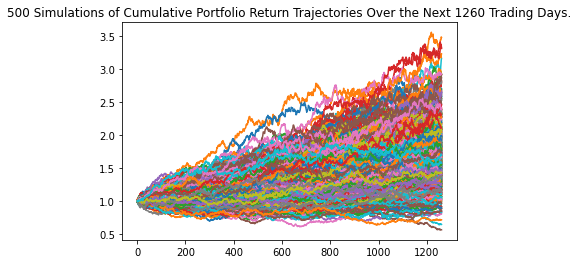

In [25]:
# Plot simulation outcomes
line_plot = MC_stock_data.plot_simulation().plot(figsize = (10,5))

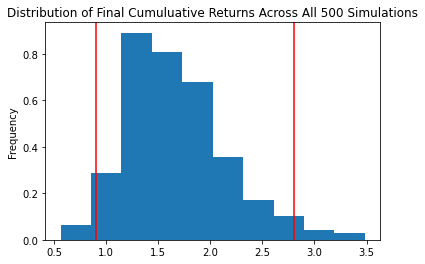

In [26]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              1.676276
std               0.475642
min               0.563226
25%               1.334464
50%               1.606562
75%               1.966415
max               3.484185
95% CI Lower      0.906240
95% CI Upper      2.806630
Name: 1260, dtype: float64


In [36]:
# Set initial investment
initial_investment = 40_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower = round(even_tbl[8] * initial_investment, 2)
even_ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower:,.2f} and ${even_ci_upper:,.2f}")

There is a 95% chance that an initial investment of $40,000.00 in the portfolio over the next 5 years will end within in the range of $47,724.27 and $215,499.90


### Ten Years Retirement Option

In [29]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.60, .40],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [30]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stock_data.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\minha\OneDrive\Documents\Financial_Analysis_Tool\MC_Sim.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998602,0.998537,0.987564,1.005031,0.995721,1.001639,1.009142,1.009045,1.014772,1.005478,...,1.002462,1.002429,1.004116,0.990331,1.018208,0.988446,1.006459,0.994368,0.990058,0.993519
2,0.992639,0.987066,0.996751,0.997005,0.991331,0.990688,1.020012,1.003655,1.006893,1.000798,...,1.016918,1.022056,0.994864,0.997457,1.009543,0.998809,1.012092,0.989726,0.974689,0.992198
3,0.970655,0.987512,1.009032,0.996509,1.001466,0.984706,1.007316,0.999541,1.006183,0.996215,...,1.026096,1.014493,0.994229,1.010861,1.010373,0.998528,1.001048,0.992829,0.977216,0.995230
4,0.971421,0.989152,1.011318,0.995958,0.999069,0.976083,1.006846,0.999491,1.025278,1.008968,...,1.036700,0.995734,0.980886,1.009274,1.023649,0.993257,1.002980,0.992698,0.970435,0.986072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.312974,2.149296,3.194043,2.859087,3.695786,2.467697,1.877506,1.526672,2.644945,2.665982,...,1.856818,1.393852,3.897543,3.688244,1.811805,2.125485,2.838734,2.438996,2.007169,1.416394
2517,2.318515,2.137651,3.178005,2.880194,3.707104,2.466861,1.871179,1.523588,2.596247,2.667173,...,1.850192,1.380119,3.912808,3.704744,1.843247,2.125169,2.826665,2.430237,2.002849,1.398585
2518,2.332796,2.136490,3.175193,2.826273,3.704891,2.464401,1.844018,1.526195,2.571341,2.642092,...,1.860264,1.364770,3.912400,3.749665,1.868407,2.137452,2.786049,2.431818,2.026432,1.405132
2519,2.320780,2.123985,3.157446,2.845705,3.704669,2.446833,1.847942,1.504246,2.586959,2.635509,...,1.875322,1.354713,3.897690,3.734837,1.867468,2.104623,2.789654,2.429667,2.046412,1.402084


[]

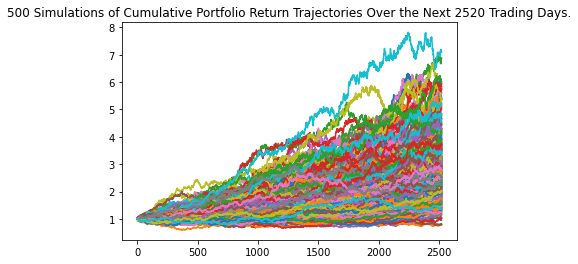

In [31]:
# Plot simulation outcomes
MC_stock_data.plot_simulation().plot(figsize = (10,5))

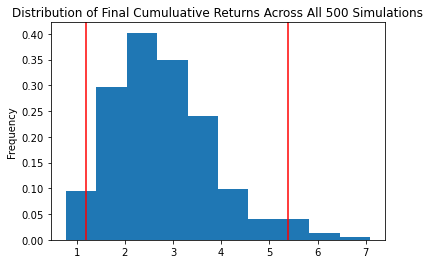

In [32]:
# Plot probability distribution and confidence intervals
dist_plot = MC_stock_data.plot_distribution()

In [33]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_stock_data.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           500.000000
mean              2.813739
std               1.062944
min               0.774536
25%               2.051997
50%               2.659822
75%               3.446571
max               7.089806
95% CI Lower      1.193107
95% CI Upper      5.387498
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 60_000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
even_ci_lower = round(even_tbl[8] * initial_investment, 2)
even_ci_upper = round(even_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,.2f} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${even_ci_lower:,.2f} and ${even_ci_upper:,.2f}")

There is a 95% chance that an initial investment of $60,000.00 in the portfolio over the next 10 years will end within in the range of $71,586.41 and $323,249.86
